### Imports
This file includes the code to compile and make visulaizations of the import data.

In [27]:
# Imports (Run before running anything else)
import matplotlib.pyplot as plt
import country_converter as cc
import shipping_network as sn
import matplotlib as mpl
import geopandas as gpd
import pandas as pd

plt.style.use('default')
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

#### Parameters
Save the files or now

In [28]:
save = True
present = False

PAGE_WIDTH = 7.5

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

#### Country Map
Make the country-level import map

/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_44407/2739697615.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Euro Area not found in regex
WORLD not found in regex


,name,iso_a3,geometry,country_name,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
172,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,310.0,2106386.497,6880884.0,298.965,2033741.922,6541008.765
176,S. Sudan,SSD,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


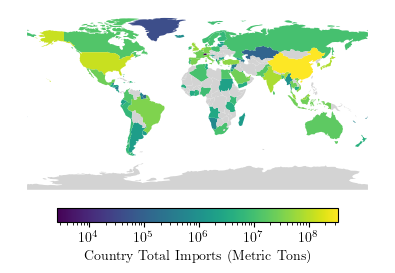

In [29]:
# Get file
country_imports = pd.read_csv('data/AISTrade.csv')
earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge Files
total_country_imports = country_imports[['country_name', 'num_pc', 'mtc', 'dwt', 'num_pc_ma', 'mtc_ma', 'dwt_ma']].groupby( # sum over three months
    by='country_name'
).sum().reset_index()
total_country_imports['iso_a3'] = cc.convert(total_country_imports['country_name']) # get iso3 to merge
total_country_imports = earth[['name', 'iso_a3', 'geometry']].merge( # merge with map
    right=total_country_imports,
    on='iso_a3',
    how='left'
)
total_country_imports['mtc'] = total_country_imports['mtc']**2/total_country_imports['mtc']


# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')

# plot
total_country_imports.plot( # condition removes lines that go around accross the pacific
    column='mtc',
    missing_kwds={'color': 'lightgrey'},
    cmap='viridis',
    legend=True,
    legend_kwds={
        'label': 'Country Total Imports (Metric Tons)',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax,
    norm=mpl.colors.LogNorm(vmin=total_country_imports[total_country_imports['mtc'] > 0]['mtc'].min(), vmax=total_country_imports['mtc'].max()) # logscale it
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/country_imports.pdf', bbox_inches='tight', pad_inches=0)
total_country_imports.tail()

#### Port Map
Make the port-level import map

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:66: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).plot(alpha=0.5, color="gray", ax=ax)


,id,name,iso3,geometry,lat,lon,portid,portcalls_cargo,portcalls_tanker,portcalls,import_cargo,import_tanker,import
1368,port932,Port Aransas_U.S.A.,USA,POINT (-97.07150 27.84668),27.846683,-97.071497,port932,36,125,161,57062.387891,6612.616261,63675.004152
1369,port81,Avatiu_Cook Islands,COK,POINT (-159.78427 -21.20386),-21.203865,-159.784274,port81,7,2,9,9048.652309,1562.541177,10611.193485
1370,port1174,Searsport_U.S.A.,USA,POINT (-68.90260 44.45613),44.456131,-68.902602,port1174,10,5,15,49302.839645,32841.145581,82143.985226
1371,port372,Galeota Point Terminal_Trinidad and Tobago,TTO,POINT (-61.00210 10.13808),10.138084,-61.002097,port372,0,0,0,0.000000,0.000000,0.000000
1372,port721,Matthew Town_Bahamas,BHS,POINT (-73.64616 21.04686),21.046857,-73.646164,port721,6,5,11,0.000000,0.000000,0.000000


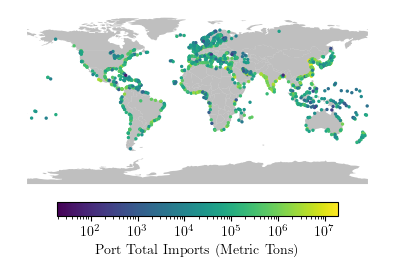

In [30]:
# Get file
port_imports = pd.read_csv('data/Daily_Port_Activity_Data_and_Trade_Estimates.csv')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]

# filter file
port_imports = port_imports[port_imports['year'] == 2021] # filter year
port_imports = port_imports[(port_imports['month'] >= 3) * (port_imports['month'] <= 5)] # filter month
total_port_imports = port_imports[['portid', 'portcalls_cargo', 'portcalls_tanker', 'portcalls', 'import_cargo', 'import_tanker', 'import']].groupby( # aggregate
    by='portid'
).sum().reset_index()
total_port_imports = ports.merge( # port_id manually checked to work for 100 ports (thank god, this would be awful)
    right=total_port_imports,
    left_on='id',
    right_on='portid'
)


# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')
sn.add_earth(ax)

# plot
total_port_imports.plot( # condition removes lines that go around accross the pacific
    markersize=2,
    column='import_cargo',
    cmap='viridis',
    legend=True,
    legend_kwds={
        'label': 'Port Total Imports (Metric Tons)',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax,
    norm=mpl.colors.LogNorm(vmin=total_port_imports[total_port_imports['import_cargo'] > 0]['import_cargo'].min(), vmax=total_port_imports['import_cargo'].max()) # logscale it
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/port_imports.pdf', bbox_inches='tight', pad_inches=0)
total_port_imports.tail()

#### Country Graph
Present daily data for a couple countries

Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not found in regex
Euro Area not 

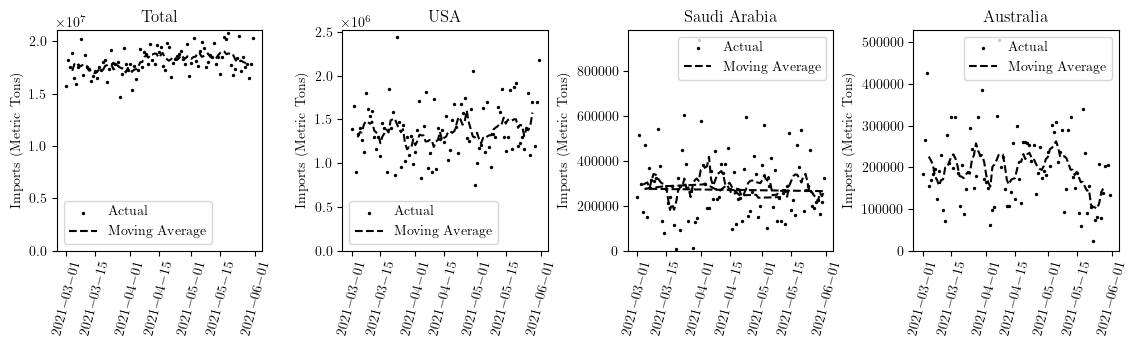

In [31]:
country1 = 'USA'
country2 = 'Saudi Arabia'
country3 = 'Australia'

# Get file
country_imports = pd.read_csv('data/AISTrade.csv')

# filter
country_imports['iso_a3'] = cc.convert(country_imports['country_name']) # get iso3 to merge
country_imports = country_imports.merge( # merge with map
    right=earth[['name', 'iso_a3', 'geometry']],
    on='iso_a3'
)
country_imports['date'] = pd.to_datetime(country_imports['date'])
total_country_imports = country_imports[['date', 'num_pc', 'mtc', 'dwt', 'num_pc_ma', 'mtc_ma', 'dwt_ma']].groupby(
    by='date'
).sum().reset_index()
sn.add_ma(total_country_imports, 'mtc', window=7)
country1_imports = country_imports[country_imports['country_name'] == country1]
sn.add_ma(country1_imports, 'mtc', window=7)
country2_imports = country_imports[country_imports['country_name'] == country2]
sn.add_ma(country2_imports, 'mtc', window=7)
country3_imports = country_imports[country_imports['country_name'] == country3]
sn.add_ma(country3_imports, 'mtc', window=7)

# plot attributes
fig, ax = plt.subplots(1, 4, sharex=True)
fig.set_figheight(1.75*PAGE_WIDTH / 4)
fig.set_figwidth(1.5*PAGE_WIDTH)
ax[0].set_title('Total')
ax[1].set_title(country1)
ax[2].set_title(country2)
ax[3].set_title(country3)

# plot
ax[0].scatter(total_country_imports['date'], total_country_imports['mtc'], label='Actual', s=2, c='k')
ax[0].plot(total_country_imports['date'], total_country_imports['ma_mtc'], 'k--', label='Moving Average')

ax[1].scatter(country1_imports['date'], country1_imports['mtc'], label='Actual', s=2, c='k')
ax[1].plot(country1_imports['date'], country1_imports['ma_mtc'], 'k--', label='Moving Average')

ax[2].scatter(country2_imports['date'], country2_imports['mtc'], label='Actual', s=2, c='k')
ax[2].plot(country2_imports['date'], country2_imports['ma_mtc'], 'k--', label='Moving Average')

ax[3].scatter(country3_imports['date'], country3_imports['mtc'], label='Actual', s=2, c='k')
ax[3].plot(country3_imports['date'], country3_imports['ma_mtc'], 'k--', label='Moving Average')

# final things
for i in range(4):
    ax[i].set_ylim(bottom=0)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75)
    ax[i].set_ylabel('Imports (Metric Tons)')
    ax[i].legend()
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/country_imports.pdf', bbox_inches='tight', pad_inches=0)

#### Port Graph
Present daily data for a couple ports

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_' + key] = df[key].rolling(
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_' + key] = df[key].rolling(
/Users/gavinengelstad/Documents/Documents - Gavin’s MacB

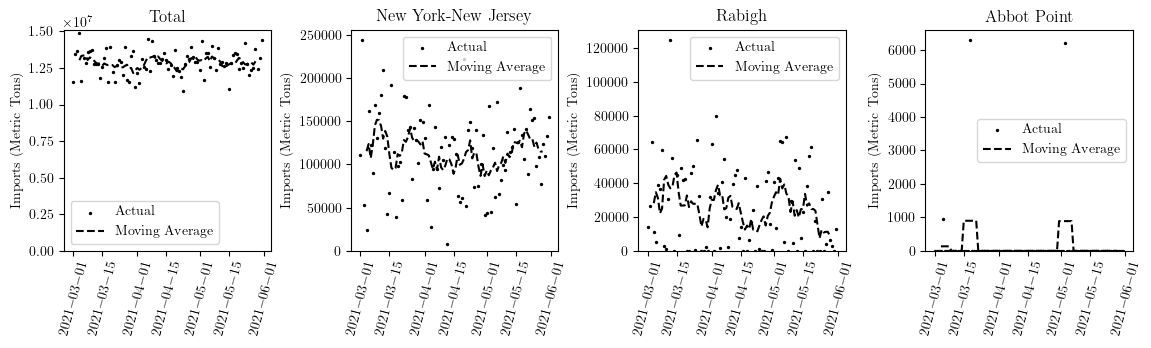

In [32]:
port1 = 'New York-New Jersey'
port2 = 'Rabigh'
port3 = 'Abbot Point'

# Get file
port_imports = pd.read_csv('data/Daily_Port_Activity_Data_and_Trade_Estimates.csv')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]

# filter file
port_imports = port_imports[port_imports['year'] == 2021] # filter year
port_imports = port_imports[(port_imports['month'] >= 3) * (port_imports['month'] <= 5)] # filter month
port_imports = port_imports.merge( # port_id manually checked to work for 100 ports (thank god, this would be awful)
    right=ports,
    left_on='portid',
    right_on='id'
).sort_values('date').reset_index()
port_imports['date'] = pd.to_datetime(port_imports['date'])
total_port_imports = port_imports[['date', 'portcalls_cargo', 'portcalls_tanker', 'portcalls', 'import_cargo', 'import_tanker', 'import']].groupby(
    by='date'
).sum().reset_index()
sn.add_ma(total_port_imports, 'import', window=7)
port1_imports = port_imports[port_imports['portname'] == port1]
sn.add_ma(port1_imports, 'import', window=7)
port2_imports = port_imports[port_imports['portname'] == port2]
sn.add_ma(port2_imports, 'import', window=7)
port3_imports = port_imports[port_imports['portname'] == port3]
sn.add_ma(port3_imports, 'import', window=7)

# plot attributes
fig, ax = plt.subplots(1, 4, sharex=True)
fig.set_figheight(1.75*PAGE_WIDTH / 4)
fig.set_figwidth(1.5*PAGE_WIDTH)
ax[0].set_title('Total')
ax[1].set_title(port1)
ax[2].set_title(port2)
ax[3].set_title(port3)

# plot
ax[0].scatter(total_port_imports['date'], total_port_imports['import'], label='Actual', s=2, c='k')
ax[0].plot(total_port_imports['date'], total_port_imports['ma_import'], 'k--', label='Moving Average')

ax[1].scatter(port1_imports['date'], port1_imports['import'], label='Actual', s=2, c='k')
ax[1].plot(port1_imports['date'], port1_imports['ma_import'], 'k--', label='Moving Average')

ax[2].scatter(port2_imports['date'], port2_imports['import'], label='Actual', s=2, c='k')
ax[2].plot(port2_imports['date'], port2_imports['ma_import'], 'k--', label='Moving Average')

ax[3].scatter(port3_imports['date'], port3_imports['import'], label='Actual', s=2, c='k')
ax[3].plot(port3_imports['date'], port3_imports['ma_import'], 'k--', label='Moving Average')

# final things
for i in range(4):
    ax[i].set_ylim(bottom=0)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75)
    ax[i].set_ylabel('Imports (Metric Tons)')
    ax[i].legend()
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/port_imports.pdf', bbox_inches='tight', pad_inches=0)